In [15]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from keras import metrics


In [8]:
# Read data

df = pd.read_csv('/Users/achen1/MIDS-W207-DeforestationAndClimate/data/train.csv', sep='\t')
print(df)

    Unnamed: 0  date      cdsd      cldd      dp01      dp10      dp1x  \
0            0  2001  0.334398  0.334398  0.465116  0.389831  0.185185   
1            1  2002  0.417465  0.417465  0.360465  0.372881  0.296296   
2            2  2003  0.418530  0.418530  0.627907  0.474576  0.185185   
3            3  2004  0.177849  0.177849  0.279070  0.169492  0.259259   
4            4  2005  0.329073  0.329073  0.744186  0.762712  0.555556   
5            5  2006  0.308839  0.308839  0.744186  0.779661  0.111111   
6            6  2007  0.172524  0.172524  0.337209  0.169492  0.185185   
7            7  2008  0.202343  0.202343  0.395349  0.203390  0.259259   
8            8  2009  0.238552  0.238552  0.534884  0.355932  0.259259   
9            9  2010       NaN       NaN       NaN       NaN       NaN   
10          10  2011  0.027689  0.027689  0.418605  0.440678  0.407407   
11          11  2012  0.332268  0.332268  0.604651  0.542373  0.444444   
12          12  2013  0.433440  0.4334

In [13]:
# Check data types

print(df.dtypes)

Unnamed: 0                           int64
date                                 int64
cdsd                               float64
cldd                               float64
dp01                               float64
                                    ...   
tc_loss_ha_Virgin Islands, U.S.    float64
tc_loss_ha_Zambia                  float64
tc_loss_ha_Zimbabwe                float64
tc_loss_ha_Åland                   float64
tc_loss_ha_average                 float64
Length: 1135, dtype: object


In [25]:
# Check for NaN

nan_counts = df.isna().sum(axis=1)
print(nan_counts)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [22]:
# Columns with NaN

nan_columns = columns_with_nan[columns_with_nan].index.tolist()
print(nan_columns)

['cdsd', 'cldd', 'dp01', 'dp10', 'dp1x', 'dsnd', 'dsnw', 'dt00', 'dt32', 'dx32', 'dx70', 'dx90', 'dyfg', 'dyts', 'emnt', 'emsd', 'emsn', 'emxp', 'emxt', 'fzf0', 'fzf1', 'fzf2', 'fzf3', 'fzf4', 'fzf5', 'fzf6', 'fzf7', 'fzf8', 'fzf9', 'hdsd', 'htdd', 'prcp', 'snow', 'tavg', 'tmax', 'tmin', 'wdmv']


In [24]:
# Replace NaNs with 0

df.fillna(0, inplace=True)

0      3
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9     35
10     7
11     5
12     5
13     3
dtype: int64


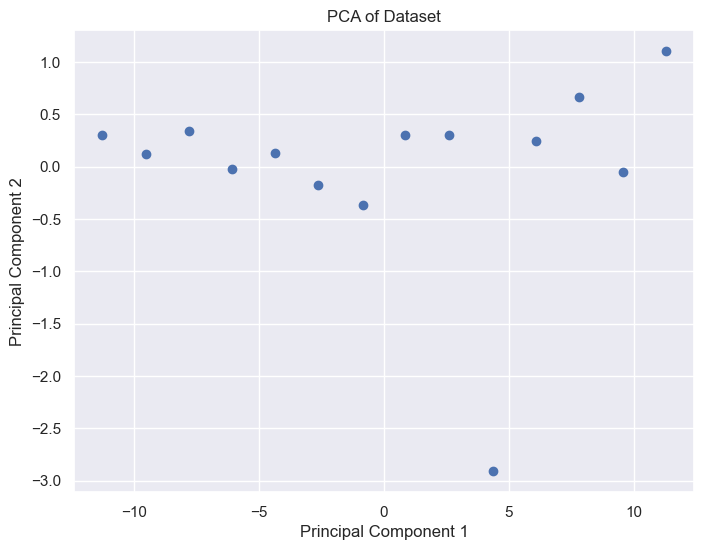

In [26]:
# PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()